In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/A_Z Handwritten Data.csv')
df.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [ ]:
df['0'].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [ ]:
classes = {i:chr(i+65) for i in range(26)}
classes

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

In [ ]:

y = df.values[:, 0] #first column of csv file are the labels
x = df.values[:, 1:] #all row values after column A are pixel values of the image which serve as data set examples

In [ ]:
# reshape images
x = np.reshape(x, (x.shape[0], 28, 28, 1))

In [ ]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
# basically it creates variations of image to get better accuracy
datagen_train = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2,
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=False,
                                   fill_mode='nearest')
datagen_test = ImageDataGenerator(rescale=1./255)

In [ ]:
#splitting the dataset into 3 parts : training set, cv set and test set
data_train = datagen_train.flow(x_train, y_train, subset='training',
                                batch_size=64, shuffle=True)
data_valid = datagen_train.flow(x_train, y_train, subset='validation',
                                batch_size=64, shuffle=True)
data_test = datagen_test.flow(x_test, y_test, batch_size=1, shuffle=False)

In [ ]:
#describing CNN hidden and output layers along with activation functions of each layer
#we will use VGG-16 CNN for this purpose
model = Sequential([
                Conv2D(8, (3,3), activation='relu', input_shape=(28, 28, 1)),
                MaxPooling2D(pool_size=(2,2)),
                Conv2D(16, (3,3), activation='relu'),
                MaxPooling2D(pool_size=(2,2)),
                Flatten(),
                Dense(512, activation='relu'),
                Dense(26, activation='softmax')])  # 26 = total english letters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 512)               2

In [ ]:
# using RMSprop as alpha optimiser and establishing loss function
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# fit model
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid,
                    steps_per_epoch=700,
                    validation_steps=50,
                    verbose=2)

Epoch 1/10
700/700 - 38s - loss: 2.9958 - accuracy: 0.1859 - val_loss: 2.7509 - val_accuracy: 0.2384 - 38s/epoch - 55ms/step
Epoch 2/10
700/700 - 37s - loss: 2.6376 - accuracy: 0.2707 - val_loss: 2.4903 - val_accuracy: 0.3341 - 37s/epoch - 52ms/step
Epoch 3/10
700/700 - 37s - loss: 2.3572 - accuracy: 0.3647 - val_loss: 2.2050 - val_accuracy: 0.4019 - 37s/epoch - 53ms/step
Epoch 4/10
700/700 - 37s - loss: 2.1053 - accuracy: 0.4222 - val_loss: 1.9904 - val_accuracy: 0.4456 - 37s/epoch - 52ms/step
Epoch 5/10
700/700 - 37s - loss: 1.8899 - accuracy: 0.4731 - val_loss: 1.8320 - val_accuracy: 0.4816 - 37s/epoch - 53ms/step
Epoch 6/10
700/700 - 39s - loss: 1.7406 - accuracy: 0.5059 - val_loss: 1.6358 - val_accuracy: 0.5297 - 39s/epoch - 55ms/step
Epoch 7/10
700/700 - 37s - loss: 1.6243 - accuracy: 0.5349 - val_loss: 1.5510 - val_accuracy: 0.5684 - 37s/epoch - 54ms/step
Epoch 8/10
700/700 - 37s - loss: 1.5326 - accuracy: 0.5628 - val_loss: 1.5211 - val_accuracy: 0.5653 - 37s/epoch - 52ms/step


In [ ]:
# get an image and its actual label/class
# the batch size in data_test is 1, each batch contains 1 sample
# each sample is a 2d nested array. index 0= image features(x), index 1= label(y)
test_img = data_test[0][0]          # data_test[i][x] i=ith sample, x=features
test_label = data_test[0][1][0]     # data_test[i][y] i=ith sample, y=label array

In [ ]:
# predict label
test_label_pred = np.argmax(model.predict(test_img))

1/1 [==============================] - 0s 200ms/step


Text(0.5, 1.0, 'actual:S, predicted:S')

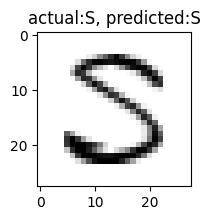

In [ ]:
# plot results
plt.figure(figsize=(2, 2))
plt.imshow(test_img.reshape(28, 28), cmap='binary')
plt.title(f'actual:{classes[test_label]}, predicted:{classes[test_label_pred]}')